# Deep Neural Network Classifier

## Import the classifier and load MNIST dataset

In [1]:
from dnn_classifier import DNNClassifier
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data")

X_train = mnist.train.images
y_train = mnist.train.labels

X_validation = mnist.validation.images
y_validation = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [6]:
from dnn_classifier import DNNClassifier
dnn = DNNClassifier(tensorboard_logdir="tensorboard_stats", random_state=42)
dnn.fit(X_train, y_train, 100, X_validation, y_validation)

Epoch: 1 Current training accuracy: 0.9000 Validation Accuracy: 0.9170 Validation Loss 0.325871
Epoch: 11 Current training accuracy: 0.9000 Validation Accuracy: 0.9512 Validation Loss 0.224825
Epoch: 21 Current training accuracy: 1.0000 Validation Accuracy: 0.9244 Validation Loss 4.509759
Stopping Early! Loss has not improved in 20 epochs


DNNClassifier(activation=<function elu at 0x000001AE03365158>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000001AE00EC8268>,
       learning_rate=0.01, max_checks_without_progress=20,
       n_hidden_layers=4, n_neurons=50,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42, show_progress=10,
       tensorboard_logdir='tensorboard_stats')

## Assess the accuracy on the test set

In [8]:
from sklearn.metrics import accuracy_score

y_pred = dnn.predict(X_test)
print("Accuracy on the test set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy on the test set: 94.76%


## Plot Representative Results

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

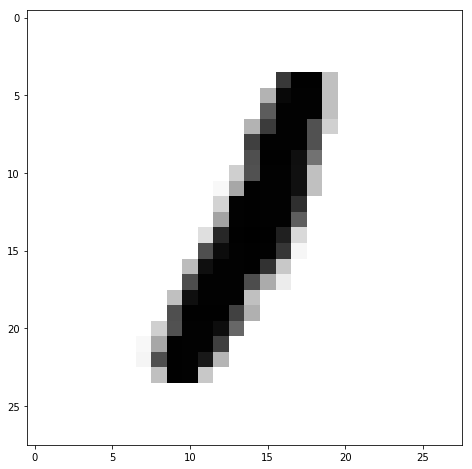

Class: 0 Confidence: 0.00%
Class: 1 Confidence: 99.85%
Class: 2 Confidence: 0.00%
Class: 3 Confidence: 0.03%
Class: 4 Confidence: 0.00%
Class: 5 Confidence: 0.00%
Class: 6 Confidence: 0.00%
Class: 7 Confidence: 0.00%
Class: 8 Confidence: 0.12%
Class: 9 Confidence: 0.00%


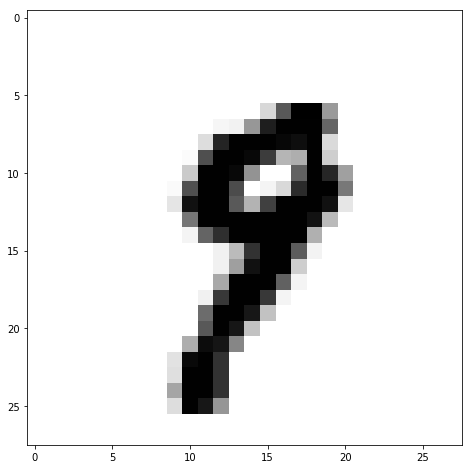

Class: 0 Confidence: 3.96%
Class: 1 Confidence: 1.58%
Class: 2 Confidence: 0.52%
Class: 3 Confidence: 0.61%
Class: 4 Confidence: 3.55%
Class: 5 Confidence: 0.44%
Class: 6 Confidence: 0.02%
Class: 7 Confidence: 2.88%
Class: 8 Confidence: 5.39%
Class: 9 Confidence: 81.06%


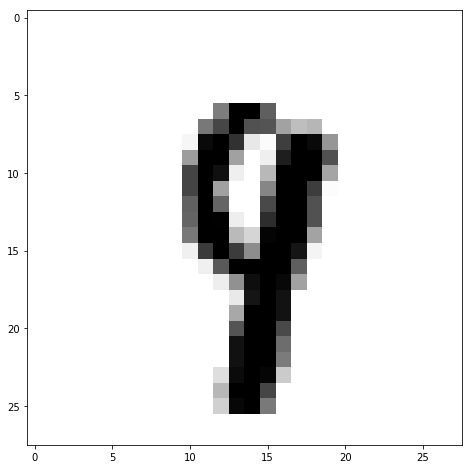

Class: 0 Confidence: 0.03%
Class: 1 Confidence: 0.00%
Class: 2 Confidence: 0.00%
Class: 3 Confidence: 0.02%
Class: 4 Confidence: 1.49%
Class: 5 Confidence: 0.03%
Class: 6 Confidence: 0.00%
Class: 7 Confidence: 1.03%
Class: 8 Confidence: 0.05%
Class: 9 Confidence: 97.34%


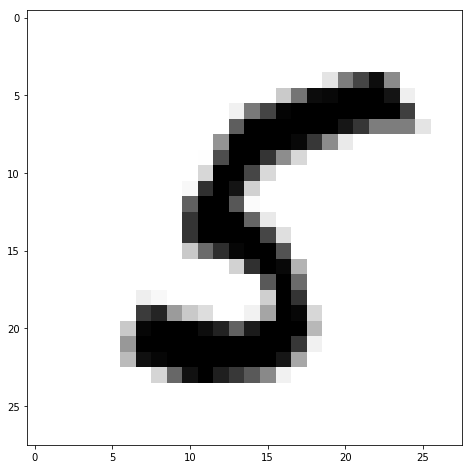

Class: 0 Confidence: 0.00%
Class: 1 Confidence: 0.00%
Class: 2 Confidence: 0.00%
Class: 3 Confidence: 0.00%
Class: 4 Confidence: 0.00%
Class: 5 Confidence: 100.00%
Class: 6 Confidence: 0.00%
Class: 7 Confidence: 0.00%
Class: 8 Confidence: 0.00%
Class: 9 Confidence: 0.00%


In [32]:
example_indices = np.random.randint(len(X_test), size=4)

for i, image_index in enumerate(example_indices):
    probabilities = dnn.predict_probabilities(X_test[image_index].reshape(-1, 784))
    plt.figure(figsize=(8,8))
    plt.imshow(X_test[image_index].reshape(28,28), cmap="binary")
    plt.show()
    for label, probability in zip(dnn.classes_, probabilities[0]):
        print("{} Confidence: {:.2f}%".format(label, probability*100))

## Use Randomized Search to find the best hyperparameters 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [38]:
import tensorflow as tf

dnn = DNNClassifier(show_progress=None, random_state=42)

parameter_distributions = {
    'n_hidden_layers': [3, 4, 5],
    'n_neurons': [40, 50, 100],
    'batch_size': [64, 128],
    'learning_rate':[0.01, 0.005],
    'activation': [tf.nn.elu, tf.nn.relu],
    'max_checks_without_progress': [20, 30],
    'batch_norm_momentum': [None, 0.9],
    'dropout_rate': [None, 0.5]
}

random_search = RandomizedSearchCV(dnn, parameter_distributions, n_iter=15, scoring='accuracy', verbose=2)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.005, dropout_rate=None, batch_size=64, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0> 
[CV]  n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.005, dropout_rate=None, batch_size=64, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0>, total=12.3min
[CV] n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.005, dropout_rate=None, batch_size=64, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0> 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.3min remaining:    0.0s


[CV]  n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.005, dropout_rate=None, batch_size=64, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0>, total=11.9min
[CV] n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.005, dropout_rate=None, batch_size=64, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0> 
[CV]  n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.005, dropout_rate=None, batch_size=64, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0>, total=11.1min
[CV] n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.01, dropout_rate=None, batch_size=128, batch_norm_momentum=0.9, activation=<function relu at 0x000001AE0335E2F0> 
[CV]  n_neurons=100, n_hidden_layers=4, max_checks_without_progress=30, learning_rate=0.01, dropout_rate=None, batch_size=128, batch_norm_momentum=0.9, activation=<fu

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 338.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x000001AE03365158>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000001AE00EC8268>,
       learning_rate=0.01, max_checks_without_progress=20,
       n_hidden_layers=4, n_neurons=50,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42, show_progress=None, tensorboard_logdir=None),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'n_hidden_layers': [3, 4, 5], 'n_neurons': [40, 50, 100], 'batch_size': [64, 128], 'learning_rate': [0.01, 0.005], 'activation': [<function elu at 0x000001AE03365158>, <function relu at 0x000001AE0335E2F0>], 'max_checks_without_progress': [20, 30], 'batch_norm_momentum': [None, 0.9], 'dropout_rate': [None, 0.5]},
          pre_dispatch='2*n_jobs', random_stat

In [39]:
random_search.best_params_

{'activation': <function tensorflow.python.ops.gen_nn_ops.elu>,
 'batch_norm_momentum': 0.9,
 'batch_size': 64,
 'dropout_rate': None,
 'learning_rate': 0.005,
 'max_checks_without_progress': 20,
 'n_hidden_layers': 3,
 'n_neurons': 100}

In [40]:
best_mnist_dnn = random_search.best_estimator_
mnist_predictions = best_mnist_dnn.predict(X_test)

print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, mnist_predictions) * 100))

Accuracy on test set: 98.18%


In [41]:
random_search.best_estimator_.save("models/mnist_random_best_model")

In [ ]:
dnn = DNNClassifier(show_progress=None, random_state=42)

parameter_grid = {
    'n_hidden_layers': [3],
    'n_neurons': [75, 100, 125, 150],
    'batch_size': [64],
    'learning_rate':[0.005],
    'activation': [tf.nn.elu],
    'max_checks_without_progress': [20, 25],
    'batch_norm_momentum': [0.9, 0.95],
}

grid_search = GridSearchCV(dnn, parameter_grid, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_
predictions = grid_search.best_estimator_.predict(X_test)

print("Score on test set: {:.2f}%".format(accuracy_score(y_test, predictions) * 100))

random_search.best_estimator_.save("models/mnist_grid_best_model")

## Titanic Dataset Predictions

In [80]:
import pandas as pd
import numpy as np

In [81]:
titanic = pd.read_excel("datasets/titanic.xls")
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [82]:
# Labels are survived, features need to drop survived, body, name
titanic_labels = np.array(titanic['survived'])
titanic_features = titanic.drop(['survived','name', 'body', 'boat'], axis=1)

# One-hot encode the categorical variables
titanic_features = pd.get_dummies(titanic_features)

#Set NAN to 0
titanic_features = np.nan_to_num(titanic_features)
titanic_features = np.array(titanic_features)

from sklearn.model_selection import train_test_split
# Put one quarter of data into testing set
X_train, X_test, y_train, y_test = train_test_split(titanic_features, titanic_labels, test_size=0.25)
print(X_train.shape, X_test.shape)

(981, 1504) (328, 1504)


In [70]:
dnn = DNNClassifier(show_progress=10, random_state=42)
dnn.fit(X_train, y_train, n_epochs=100)

Epoch: 1 Current training accuracy: 0.5000
Epoch: 11 Current training accuracy: 1.0000
Epoch: 21 Current training accuracy: 0.9500
Epoch: 31 Current training accuracy: 1.0000
Epoch: 41 Current training accuracy: 1.0000
Epoch: 51 Current training accuracy: 1.0000
Epoch: 61 Current training accuracy: 1.0000
Epoch: 71 Current training accuracy: 1.0000
Epoch: 81 Current training accuracy: 1.0000
Epoch: 91 Current training accuracy: 1.0000


In [71]:
from sklearn.metrics import accuracy_score
survival_predictions= dnn.predict(X_test)
print("Score on test set: {:.2f}%".format(accuracy_score(y_test, survival_predictions) * 100))

Score on test set: 76.52%


## Try dropout to reduce overfitting

In [76]:
dnn = DNNClassifier(dropout_rate=0.25, show_progress=10, random_state=42)
dnn.fit(X_train, y_train, n_epochs=100)

survival_predictions= dnn.predict(X_test)
print("Score on test set: {:.2f}%".format(accuracy_score(y_test, survival_predictions) * 100))

Epoch: 1 Current training accuracy: 0.5000
Epoch: 11 Current training accuracy: 0.8500
Epoch: 21 Current training accuracy: 0.8500
Epoch: 31 Current training accuracy: 0.8000
Epoch: 41 Current training accuracy: 0.9500
Epoch: 51 Current training accuracy: 0.9500
Epoch: 61 Current training accuracy: 0.9000
Epoch: 71 Current training accuracy: 0.9000
Epoch: 81 Current training accuracy: 0.9000
Epoch: 91 Current training accuracy: 0.9000
Score on test set: 78.05%


In [74]:
dnn = DNNClassifier(dropout_rate=0.5, show_progress=10, random_state=42)
dnn.fit(X_train, y_train, n_epochs=100)

survival_predictions= dnn.predict(X_test)
print("Score on test set: {:.2f}%".format(accuracy_score(y_test, survival_predictions) * 100))

Epoch: 1 Current training accuracy: 0.3500
Epoch: 11 Current training accuracy: 0.7000
Epoch: 21 Current training accuracy: 0.8500
Epoch: 31 Current training accuracy: 0.4500
Epoch: 41 Current training accuracy: 0.6000
Epoch: 51 Current training accuracy: 0.7000
Epoch: 61 Current training accuracy: 0.7000
Epoch: 71 Current training accuracy: 0.6500
Epoch: 81 Current training accuracy: 0.8000
Epoch: 91 Current training accuracy: 0.6500
Score on test set: 75.00%


## Put my dad and myself on the boat and see if we make it

In [86]:
import random
# Randomly choose cabin, ticket, destination, and boat
my_cabin = random.choice(titanic['cabin'])
father_cabin = random.choice(titanic['cabin'])
my_ticket = random.choice(titanic['ticket'])
father_ticket = random.choice(titanic['ticket'])
my_boat = random.choice(titanic['boat'])
father_boat = random.choice(titanic['boat'])
my_dest = random.choice(titanic['home.dest'])
father_dest = random.choice(titanic['home.dest'])

# Create list of features for family 
me = [2, 1, "Koehrsen, William", "male", 21, 2, 2, my_ticket, 50, my_cabin, 'S', my_boat, np.nan, my_dest]
father = [1, 1, "Koehrsen, Craig", "male", 50, 2, 2, father_ticket, 200, father_cabin, 'S', father_boat, np.nan, father_dest]

# Insert into dataframe at end
titanic.loc[1309] = me
titanic.loc[1310] = father

# Manipulate dataframe to acceptable format
titanic_with_family = titanic.drop(['survived','name', 'body', 'boat'], axis=1)
titanic_with_family = pd.get_dummies(titanic_with_family)
titanic_with_family = np.nan_to_num(titanic_with_family)
me = titanic_with_family[1309]
father = titanic_with_family[1310]

# Predict survival
my_survival_chances = dnn.predict_probabilities(me.reshape(-1, X_train.shape[1]))
father_survival_chances = dnn.predict_probabilities(father.reshape(-1, X_train.shape[1]))

# Display survival chances
print('My survival chances: {0[0]} = {1[0][0]:.6f}%, {0[1]} = {1[0][1]:.6f}%'.format(dnn.classes_, my_survival_chances*100))
print('Father\'s survival chances: {0[0]} = {1[0][0]:.6f}%, {0[1]} = {1[0][1]:.6f}%'.format(dnn.classes_, father_survival_chances*100))

My survival chances: 0 = 99.754364%, 1 = 0.245640%
Father's survival chances: 0 = 22.329571%, 1 = 77.670425%


In [85]:
dnn.save("/models/titanic_survival_model")

## Future Implementations
Other datasets, more tunable parameters, additional activation functions as they are developed, incorporate into a convolutional neural network or recurrent neural network. 